In [1]:
import numpy as np
import pandas as pd
import sympy as sym
from matplotlib import pyplot as plt

In [2]:
a = sym.symbols("a")
k1 = sym.symbols("K_u1^a")
k1.subs(a,10)
display(k1)

K_u1^a

<AxesSubplot:xlabel='H'>

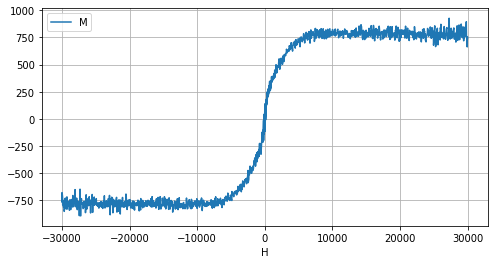

In [3]:
hyst1 = pd.read_csv('data/hyst1.csv', sep='\t')
hyst1 = hyst1.sort_values(by='H')

hyst1.plot(x='H', y='M', grid=True, figsize=(8,4))

<IPython.core.display.Javascript object>


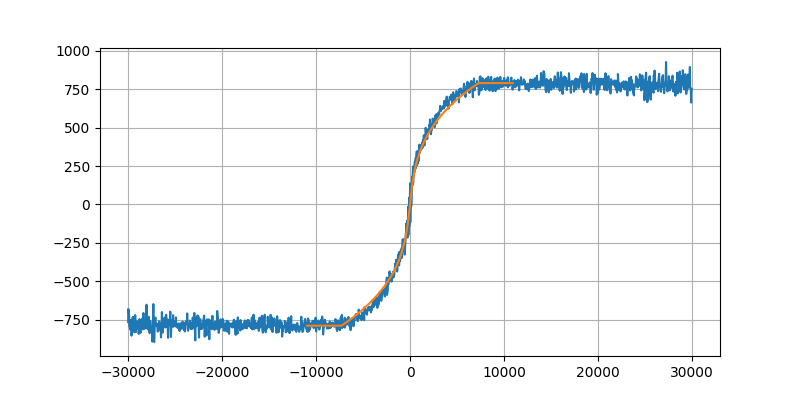

513500.0
1185000.0
4434835.95021078


In [9]:
%matplotlib notebook
def energy(tet, H, Ms, Ku1, Ku2):
    return Ku1*(np.sin(tet)**2) + Ku2*(np.sin(tet)**4) - H*Ms*np.sin(tet)

Hk1 = 7.5e3
Hk2 = 6e3
Ms = 790.

Ku2 = Hk2*Ms/4.
Ku1 = Hk1*Ms/2. - 2*Ku2

tet = np.linspace(-np.pi, np.pi, 1000)

Hs = np.linspace(-Hk1*1.5, Hk1*1.5 , 1000)
    
st_angs = []
for H in Hs:
    Es = energy(tet, H, Ms, Ku1, Ku2)
    #plt.plot(np.rad2deg(tet), Es)
    st_angs.append(tet[Es.argmin()])

st_angs = np.array(st_angs)

plt.figure(figsize = (8,4))
plt.plot(hyst1.H, hyst1.M)
plt.plot(Hs, Ms*np.sin(st_angs))
plt.grid(True)

print(Ku1)
print(Ku2)
print(Ku1+2*np.pi*(Ms**2))